In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
plt.rc('font',size=12)
plt.rc('legend',fontsize=10)

In [2]:
c_p0=1e-6
c_su0=10e-6
c_u0=20e-6

k_su2p=8.500e3  *60
k_su2m=1.785e-1  *60

k_sup=5.950e2  *60
k_sum=1.785e-1  *60

k_ip=1.250e-1  *60
k_im=1.000e-3  *60

k_dp=6.364e-2  *60
k_dm=1.000e-3  *60

k_hp=2.968e-2  *60
k_hm=1.000e-3  *60

k_sp=1.000e-3  *60
k_sm=8.925e-2  *60

k_up=1.000e-3  *60
k_um=5.625e-1  *60

k_tp=5.400e-1  *60
k_tm=10.125  *60

ts=np.linspace(0,30,1000)

def solve_func(p):
    k_su2p,k_su2m,k_sup,k_sum,k_ip,k_im,k_dp,k_dm,k_hp,k_hm,k_sp,k_sm,k_up,k_um,k_tp,k_tm=p
    K_u=k_tm/k_tp
    def func(t,y):
        c_pd,c_pdsu2,c_pdsu,c_pdusui,c_pdusi,c_pdu,c_pdusu,c_pdt,c_su2,c_su,c_u=y
        
        return [
            (k_su2m*c_pdsu2 - k_su2p*c_su0*c_su2*c_pd) + (k_sum*c_pdsu - k_sup*c_su0*c_su*c_pd) + (k_um*c_pdu - k_up*c_u*c_u0*c_pd) + (k_tm*c_pdt - k_tp*c_pd),
            (k_su2p*c_su0*c_su2*c_pd - k_su2m*c_pdsu2) + (k_im*c_pdusui - k_ip*c_pdsu2) + (k_dm*c_pdusu - k_dp*c_pdsu2),
            (k_sup*c_su0*c_su*c_pd - k_sum*c_pdsu) + (k_im*c_pdusi - k_ip*c_pdsu),
            (k_ip*c_pdsu2 - k_im*c_pdusui) + (k_hm*c_pdu - k_hp*c_pdusui),
            (k_ip*c_pdsu - k_im*c_pdusi) + (k_hm*c_pdu - k_hp*c_pdusi),
            (k_hp*c_pdusui - k_hm*c_pdu) + (k_hp*c_pdusi - k_hm*c_pdu) + (k_sm*c_pdusu - k_sp*c_su*c_su0*c_pdu) + (k_up*c_u*c_u0*c_pd - k_um*c_pdu),
            (k_dp*c_pdsu2 - k_dm*c_pdusu) + (k_sp*c_su*c_su0*c_pdu - k_sm*c_pdusu),
            (k_tp*c_pd - k_tm*c_pdt),
            (k_su2m*c_pdsu2*c_p0/c_su0 - k_su2p*c_su2*c_pd*c_p0),
            (k_sum*c_pdsu*c_p0/c_su0 - k_sup*c_su*c_pd*c_p0) + (k_sm*c_pdusu*c_p0/c_su0 - k_sp*c_su*c_pdu*c_p0),
            (k_um*c_pdu*c_p0/c_u0 - k_up*c_u*c_pd*c_p0)
        ]
    result=integrate.solve_ivp(func,
                                (0,30),
                                (K_u/(1+K_u),0.0,0.0,0.0,0.0,0.0,0.0,1/(1+K_u),1.0,0.0,0.0),
                                t_eval=ts,
                                method='LSODA')
    return result

para_delta=0.00001
paras=np.array([k_su2p,k_su2m,k_sup,k_sum,k_ip,k_im,k_dp,k_dm,k_hp,k_hm,k_sp,k_sm,k_up,k_um,k_tp,k_tm])
para_num=len(paras)
sa_eas=[]
sa_eds=[]
sa_sds=[]
sa_stots=[]

result1=solve_func(paras).y[:,1:]
c_ea1=result1[0]+result1[1]+result1[2]
c_ed1=result1[3]+result1[4]
c_sd1=result1[5]+result1[6]+result1[7]
c_stot1=result1[-2]+result1[-3]

for i in range(para_num):
    paras_delta=paras.copy()
    paras_delta[i]*=1+para_delta
    result2=solve_func(paras_delta).y[:,1:]

    c_ea2=result2[0]+result2[1]+result2[2]
    c_ed2=result2[3]+result2[4]
    c_sd2=result2[5]+result2[6]+result2[7]
    c_stot2=result2[-2]+result2[-3]

    sa_eas.append((c_ea2-c_ea1)/c_ea1/para_delta)
    sa_eds.append((c_ed2-c_ed1)/c_ed1/para_delta)
    sa_sds.append((c_sd2-c_sd1)/c_sd1/para_delta)
    sa_stots.append((c_stot2-c_stot1)/c_stot1/para_delta)

sa_eas=np.array(sa_eas)
sa_eds=np.array(sa_eds)
sa_sds=np.array(sa_sds)
sa_stots=np.array(sa_stots)

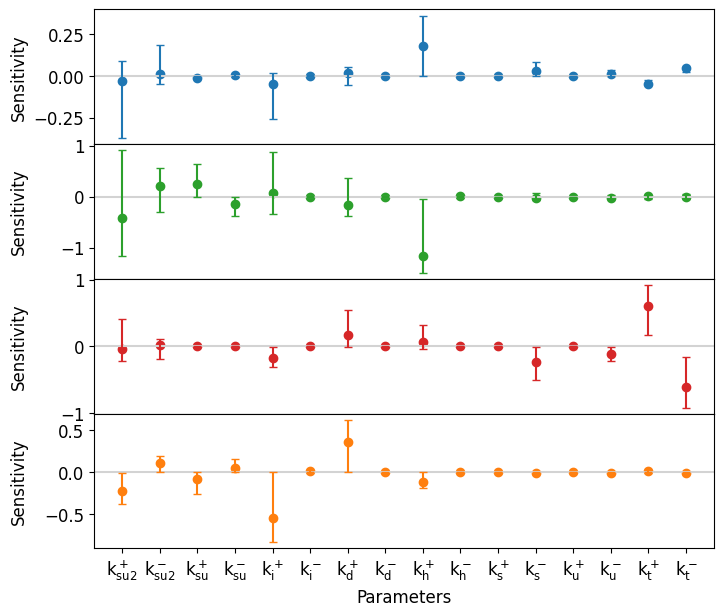

In [3]:
para_names=['k_{su2}^+','k_{su2}^-','k_{su}^+','k_{su}^-','k_i^+','k_i^-','k_d^+','k_d^-','k_h^+','k_h^-','k_s^+','k_s^-','k_u^+','k_u^-','k_t^+','k_t^-']

curves=[sa_eas,sa_eds,sa_sds,sa_stots]
curve_colors=['tab:blue','tab:green','tab:red','tab:orange']

fig=plt.figure(figsize=(8,7))
axs=fig.subplots(4,1)

for i in range(4):
    curve=curves[i][:,1:]
    axs[i].axhline(0,color='lightgrey')
    axs[i].scatter(np.arange(para_num),np.average(curve,axis=1),color=curve_colors[i])
    axs[i].errorbar(np.arange(para_num),np.average(curve,axis=1),
                np.vstack((np.average(curve,axis=1)-np.min(curve,axis=1),np.max(curve,axis=1)-np.average(curve,axis=1))),
                capsize=3,linestyle='none',color=curve_colors[i])
    axs[i].set_ylabel('Sensitivity')
    axs[i].set_xticks([])
# plt.xticks(np.arange(para_num),[f'$\\rm {i}$' for i in para_names],rotation=-50,ha='center')
axs[3].set_xticks(np.arange(para_num))
axs[3].set_xticklabels([f'$\\rm {i}$' for i in para_names],ha='center')
axs[3].set_xlabel('Parameters')

fig.subplots_adjust(hspace=0)
fig.align_ylabels(axs)